# Table of Contents

## 01. Importing Libraries and Dataframe

## 02. The Elbow Technique

## 03. k-Means Clustering

## 04. Extracting Dataframe

---

## 01. Importing Libraries and Dataframe

In [8]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.


In [9]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
path= r'C:\Users\marze\Gun Violence'

In [11]:
# import the cleaned data from the last exercise 

gv_df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '6.4_gun_violence_cleaned.csv'))

In [12]:
gv_df.head()

,Unnamed: 0,Incident_ID,Date,Year,Month,Day,State,City or County,Number Killed,Number Injured,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,0,4,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,1,460726,2013-01-01,2013,1,1,California,Hawthorne,1,3,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1,3,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,3,478925,2013-01-05,2013,1,5,Colorado,Aurora,4,0,...,NaN,NaN,0,0,4,4,3,1,3,1
4,4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,2,2,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1


In [13]:
# drop unnamed column
gv_df = gv_df.drop(columns = ['Unnamed: 0'])

In [14]:
# check column names
gv_df.columns

Index(['Incident_ID', 'Date', 'Year', 'Month', 'Day', 'State',
       'City or County', 'Number Killed', 'Number Injured',
       'Number of Guns Involved', 'Incident Characteristics',
       'Congressional District', 'Latitude', 'Longitude', 'Location Combined',
       'Location Description', 'Notes', 'Child Participants 0-11',
       'Teen Participants 12-17', 'Adult Participants 18+',
       'Total Participants', 'Male Participants', 'Female Participants',
       'Victim Count', 'Suspect Count'],
      dtype='object')

In [15]:
#change weekday and month numbers to full names for easier interpretation
#check data types
gv_df['Day'].dtype
gv_df['Month'].dtype

dtype('int64')

In [16]:
# check for unique values for week day 
unique_week_days = gv_df['Day'].unique()

#print unique values
print(unique_week_days)

[1 5 0 2 4 6 3]


In [17]:
import calendar

# changing week day and month numeric values to str names
gv_df['Day'] = gv_df['Day'].apply(lambda x: calendar.day_name[x])
gv_df['Month'] = gv_df['Month'].apply(lambda x: calendar.month_name[x])

In [18]:
gv_df.head()

,Incident_ID,Date,Year,Month,Day,State,City or County,Number Killed,Number Injured,Number of Guns Involved,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,461105,2013-01-01,2013,January,Tuesday,Pennsylvania,Mckeesport,0,4,NaN,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,460726,2013-01-01,2013,January,Tuesday,California,Hawthorne,1,3,NaN,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,478855,2013-01-01,2013,January,Tuesday,Ohio,Lorain,1,3,2.0,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,478925,2013-01-05,2013,January,Saturday,Colorado,Aurora,4,0,NaN,...,NaN,NaN,0,0,4,4,3,1,3,1
4,478959,2013-01-07,2013,January,Monday,North Carolina,Greensboro,2,2,2.0,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1


In [19]:
# check missing values
gv_df.isnull().sum()

Incident_ID                      0
Date                             0
Year                             0
Month                            0
Day                              0
State                            0
City or County                   0
Number Killed                    0
Number Injured                   0
Number of Guns Involved      99451
Incident Characteristics       326
Congressional District       11944
Latitude                      7923
Longitude                     7923
Location Combined                0
Location Description        197588
Notes                        81017
Child Participants 0-11          0
Teen Participants 12-17          0
Adult Participants 18+           0
Total Participants               0
Male Participants                0
Female Participants              0
Victim Count                     0
Suspect Count                    0
dtype: int64

In [20]:
# Create a subset which contains only the needed numerical columns (that also don't have NaNs)

df = gv_df[['Number Killed', 'Number Injured', 'Location Combined', 'Child Participants 0-11', 'Teen Participants 12-17',
            'Adult Participants 18+', 'Total Participants', 'Male Participants', 'Female Participants', 'Victim Count', 'Suspect Count' ]]

---

## 02. The Elbow Technique

In [23]:
num_cl = range(1,10) # defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # defines k-means clusters in the range assigned

In [24]:
# create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

[-4343069.967681586,
 -2572854.7684316337,
 -2064906.0758576437,
 -1704332.3402782688,
 -1458546.2030994678,
 -1357977.6356725164,
 -1275161.819838487,
 -1212200.635391426,
 -1114812.709224675]

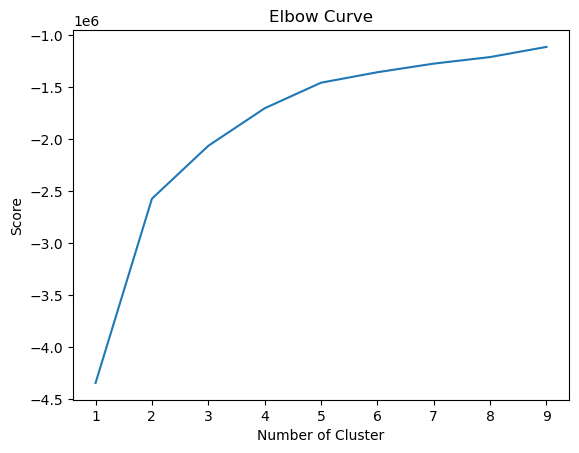

In [25]:
# plot the elbow curve using pylab

pl.plot(num_cl, score)
pl.xlabel('Number of Cluster')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There are jumps starting from 2 increasing up until 5 before the line smoothes out. Based on this line graph, I should use 5 as my cluster number.

---

## 03. k-Means Clustering

In [29]:
# create the k-means object
kmeans = KMeans(n_clusters = 5)

In [30]:
# fit the k-means object to the data
kmeans.fit(df)

KMeans(n_clusters=5)

In [31]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\marze\AppData\Local\Temp\ipykernel_19596\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [32]:
df.head()

,Number Killed,Number Injured,Location Combined,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count,clusters
0,0,4,0,0,0,5,4,3,1,4,1,2
1,1,3,1,0,0,4,1,1,0,4,1,2
2,1,3,0,0,0,5,5,5,0,3,2,4
3,4,0,2,0,0,4,4,3,1,3,1,4
4,2,2,3,0,1,3,4,2,2,3,1,4


In [33]:
# check the frequency of each unique value in the 'clusters' column
df['clusters'].value_counts()

clusters
0    100132
3     54425
2     38309
1     30129
4     16682
Name: count, dtype: int64

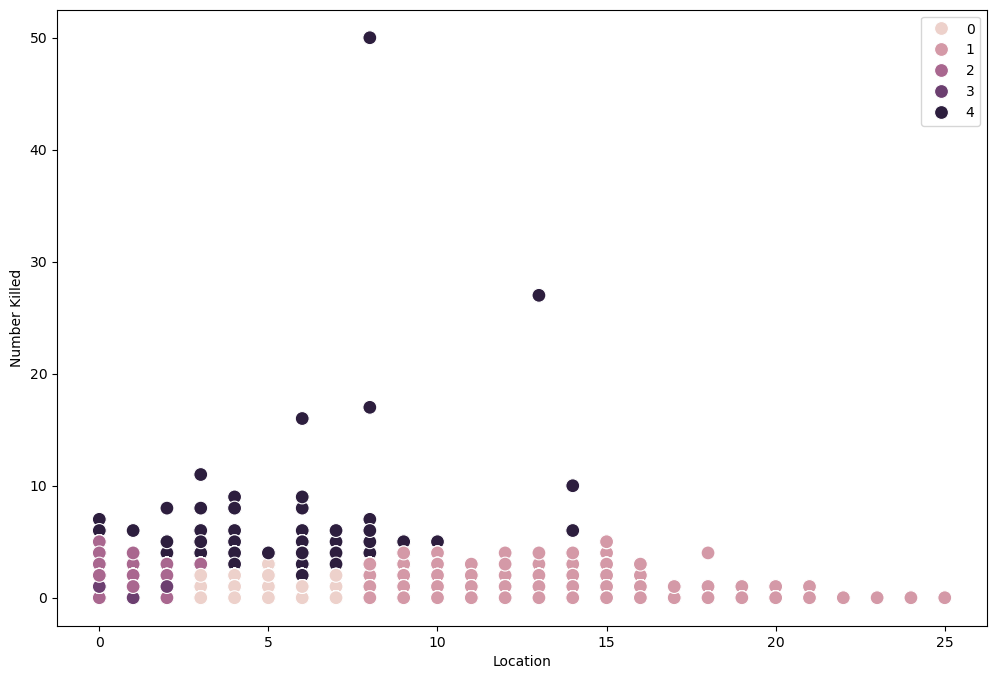

In [34]:
# plot the clusters for the "Number Killed" and "Location Combined"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Location Combined'], y=df['Number Killed'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Location') # Label x-axis.
plt.ylabel('Number Killed') # Label y-axis.
plt.savefig(os.path.join(path, '04 Visualizations', '6.5_cluster_n_killed_location.png'))
plt.show()

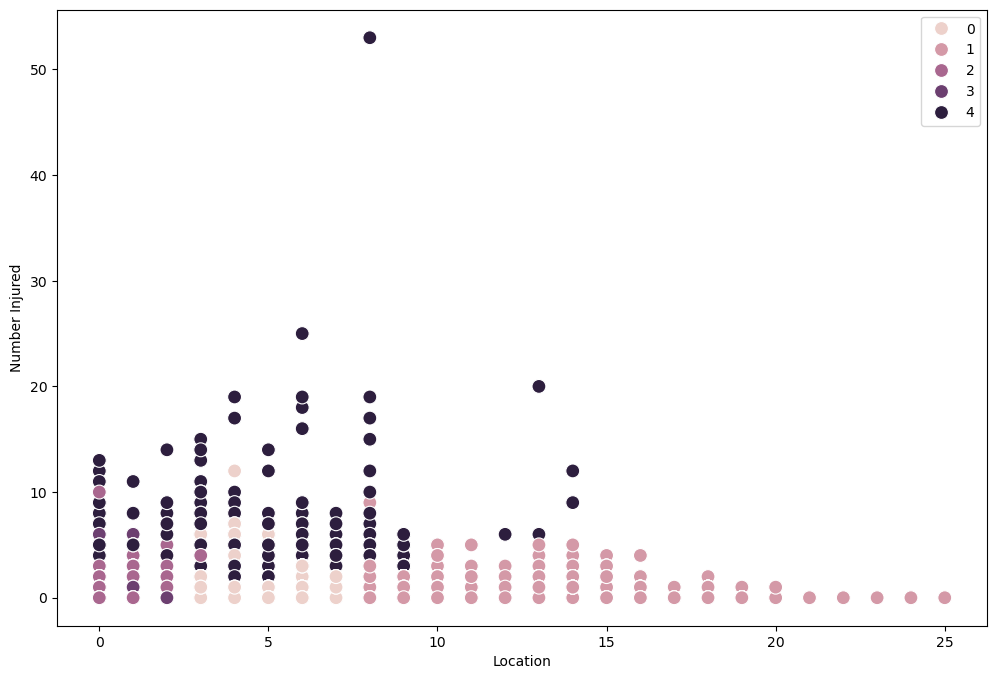

In [35]:
# plot the clusters for the "Number injured" and "Location combined"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Location Combined'], y=df['Number Injured'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Location') 
plt.ylabel('Number Injured') 
plt.savefig(os.path.join(path, '04 Visualizations', '6.5_cluster_n_injured_location.png'))
plt.show()

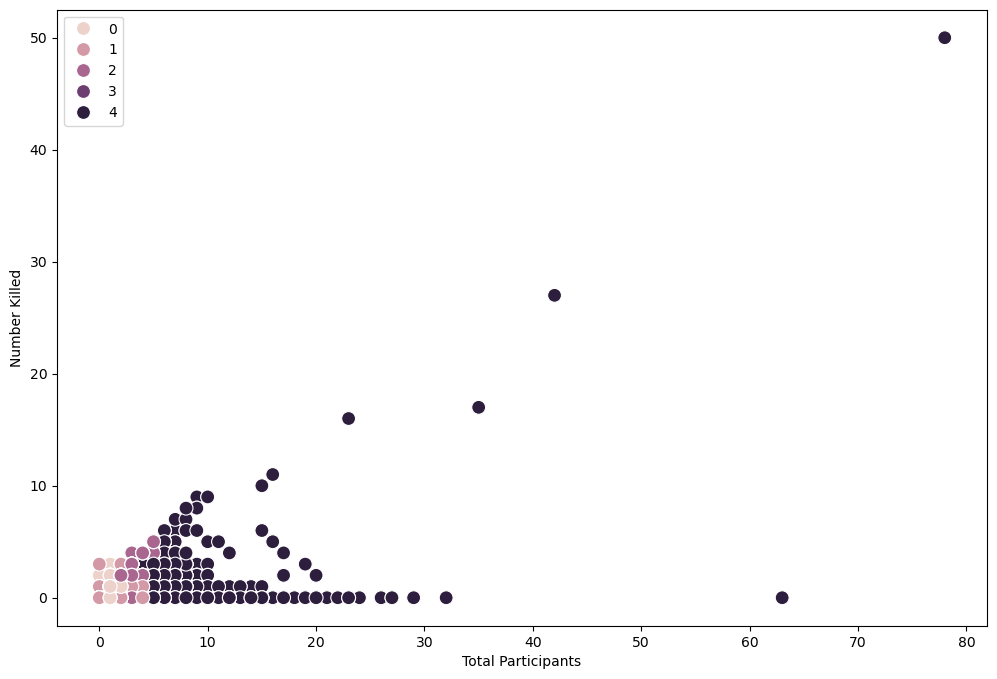

In [36]:
# Plot the clusters for the "Number Killed" and "Total Participants" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Participants'], y=df['Number Killed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total Participants') 
plt.ylabel('Number Killed')
plt.savefig(os.path.join(path, '04 Visualizations', '6.5_cluster_total_participants_n_killed.png'))
plt.show()

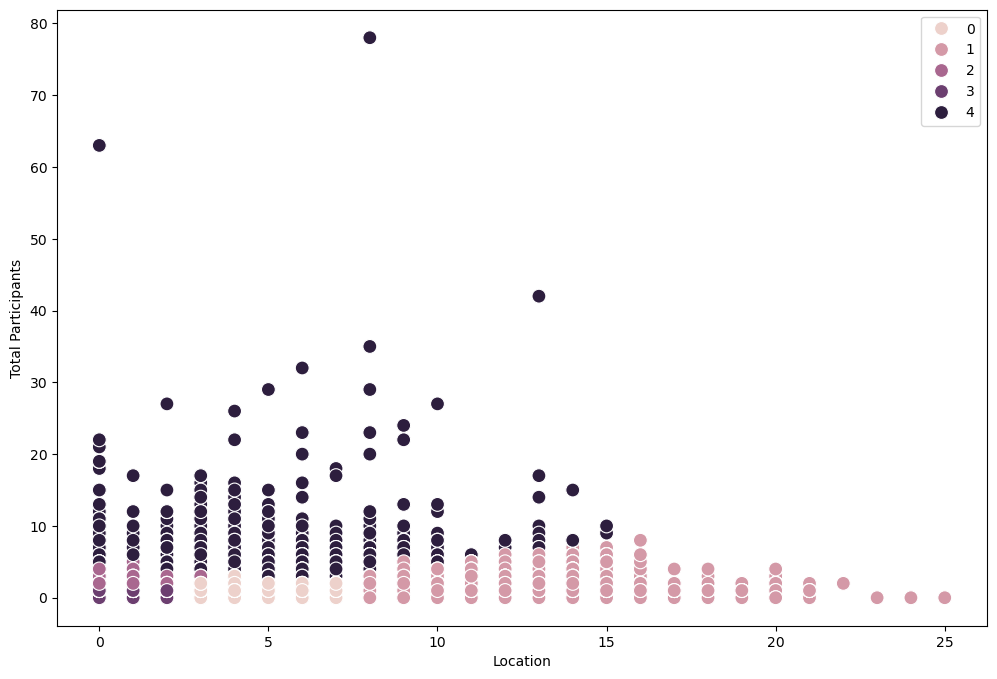

In [37]:
# Plot the clusters for the "Total Participants" and "location Combined" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Location Combined'], y=df['Total Participants'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Location') 
plt.ylabel('Total Participants') 
plt.savefig(os.path.join(path, '04 Visualizations', '6.5_cluster_total_participants_location.png'))
plt.show()

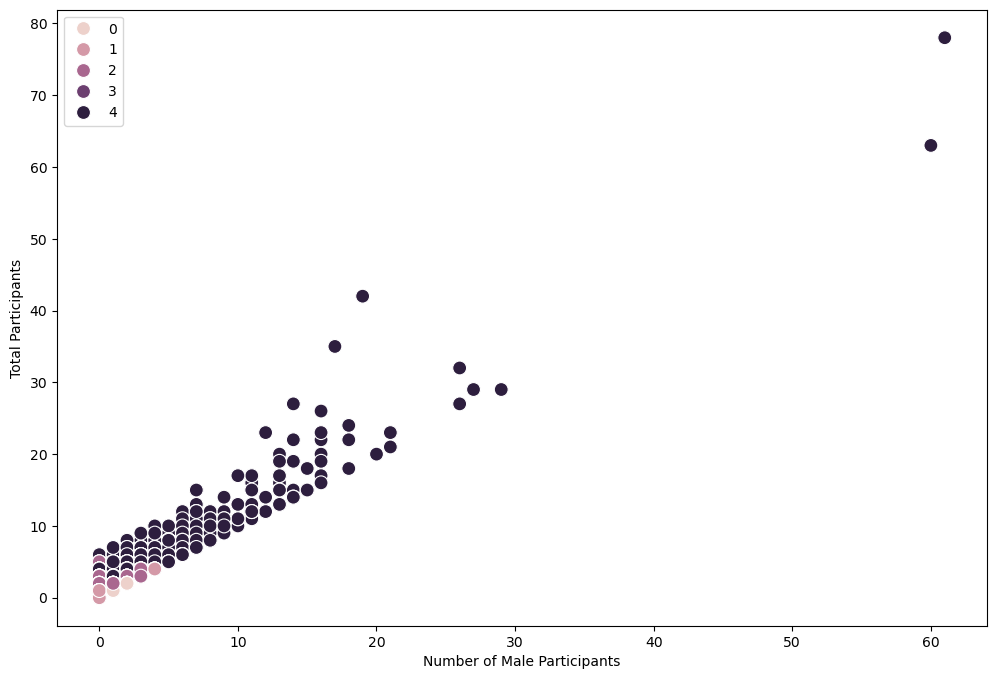

In [38]:
# Plot the clusters for the "Total participants" and "Male participants" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Male Participants'], y=df['Total Participants'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Male Participants') 
plt.ylabel('Total Participants') 
plt.savefig(os.path.join(path, '04 Visualizations', '6.5_cluster_total_participants_male_participants.png'))
plt.show()

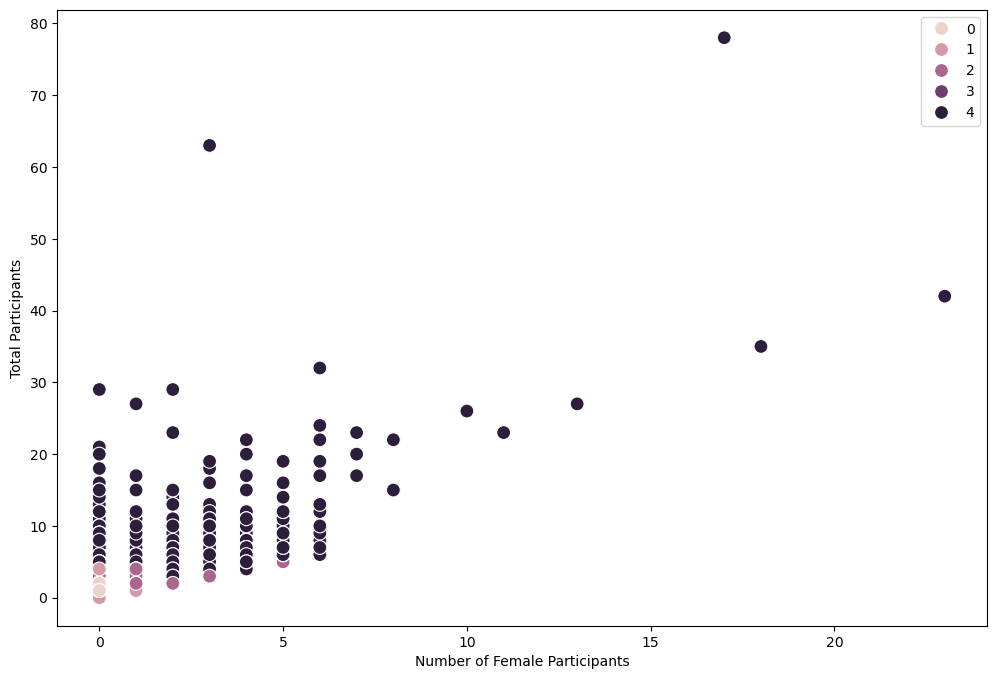

In [39]:
# Plot the clusters for the "Total participants" and "Female participants" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Female Participants'], y=df['Total Participants'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Female Participants') 
plt.ylabel('Total Participants') 
plt.savefig(os.path.join(path, '04 Visualizations', '6.5_cluster_total_participants_female_participants.png'))
plt.show()

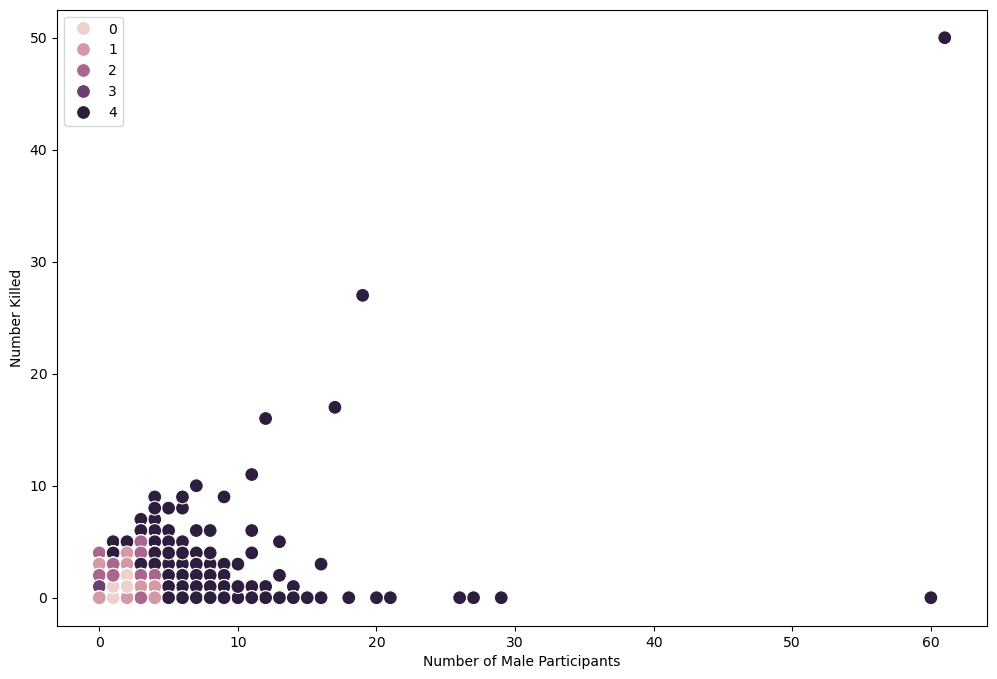

In [40]:
# Plot the clusters for the "Male Participants" and "Number Killed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Male Participants'], y=df['Number Killed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Male Participants') 
plt.ylabel('Number Killed') 
plt.savefig(os.path.join(path, '04 Visualizations', '6.5_cluster_n_killed_male_participants.png'))
plt.show()

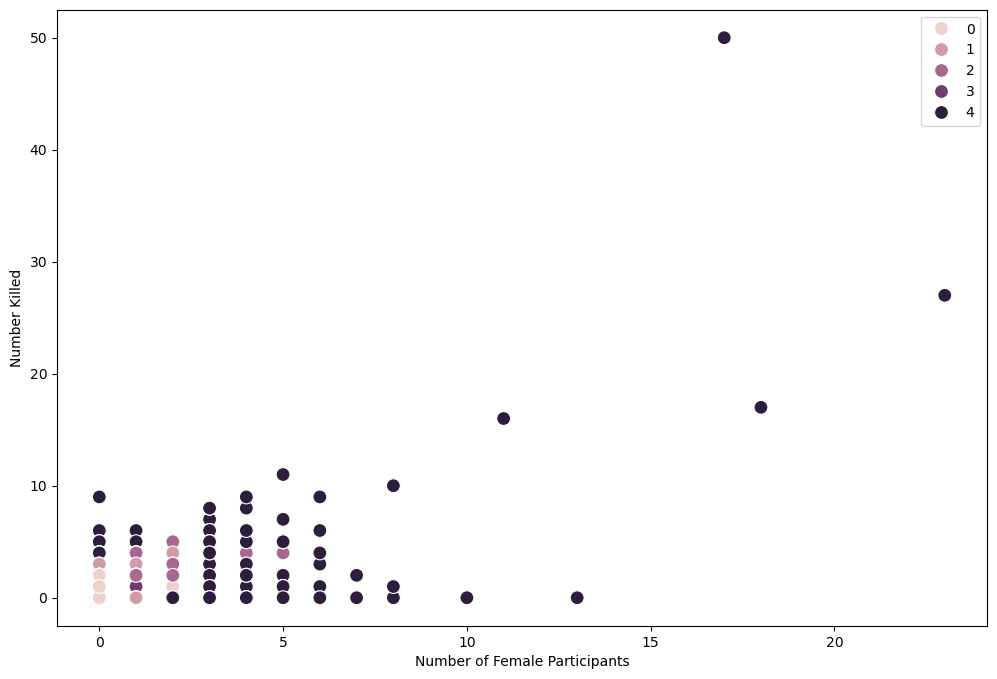

In [41]:
# Plot the clusters for the "Female participants" and "Number killed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Female Participants'], y=df['Number Killed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Female Participants') 
plt.ylabel('Number Killed') 
plt.savefig(os.path.join(path, '04 Visualizations', '6.5_cluster_n_killed_female_participants.png'))
plt.show()

1. "Number Killed" and "Location Combined" : The cluster graph illustrates that the majority of incidents involve a lower number of fatalities, with a few locations standing out as significant outliers where fatalities are much higher.
2. "Number Injured" and "Location Combined": The cluster graph shows a concentration of incidents with a lower number of injuries, while a few outliers indicate significantly higher numbers.
3. "Number Killed" and "Total Participants": The cluster graph highlights that the majority of incidents involve relatively few participants and result in fewer fatalities, as shown by the dense clustering in the lower left corner.
4. "Total Participants" and "Location Combined": The cluster graph reveals that the majority of incidents have a lower number of total participants, with a dense concentration in the lower range. A few outliers show significantly higher participant counts, indicating potential anomalies or areas of particular interest.
5. "Total Participants" and "Number of Male Participants": The cluster graph shows a positive correlation between the number of male participants and the total number of participants, with most points clustered at lower values, indicating smaller groups.
6. "Total Participants" and "Number of Female Participants": The cluster graph shows that most incidents involve a small number of female participants and total participants, as indicated by the dense clustering in the lower left corner.
7. "Number Killed" and "Number of Male Participants": The cluster graph reveals that most incidents with male participants have fewer fatalities, as indicated by the dense clustering in the lower left corner. However, there are a few significant outliers with higher fatalities and varying numbers of male participants, suggesting specific incidents of greater severity.
8. "Number Killed" and "Number of Female Participants": The cluster graph shows that the majority of incidents involve a low number of total participants and fewer fatalities, with a dense cluster in the lower left corner.

In [43]:
#create a column that renames the clusters to colors 
df.loc[df['clusters'] == 4, 'cluster'] = 'black'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'peach'

C:\Users\marze\AppData\Local\Temp\ipykernel_19596\2972364705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 4, 'cluster'] = 'black'


In [44]:
df.columns

Index(['Number Killed', 'Number Injured', 'Location Combined',
       'Child Participants 0-11', 'Teen Participants 12-17',
       'Adult Participants 18+', 'Total Participants', 'Male Participants',
       'Female Participants', 'Victim Count', 'Suspect Count', 'clusters',
       'cluster'],
      dtype='object')

In [45]:
df.groupby('cluster').agg({'Number Killed':['mean', 'median'], 
                         'Number Injured':['mean', 'median'], 
                         'Total Participants':['mean', 'median'],
                           'Male Participants':['mean', 'median'],
                           'Female Participants':['mean', 'median']})

Number Killed        Number Injured        Total Participants  \
                     mean median           mean median               mean   
cluster                                                                     
black            0.474523    0.0       0.948567    1.0           3.964513   
dark purple      0.141938    0.0       0.390005    0.0           0.799871   
peach            0.231085    0.0       0.422183    0.0           1.041825   
pink             0.282718    0.0       0.399549    0.0           1.408643   
purple           0.343783    0.0       0.705839    1.0           2.350596   

                   Male Participants        Female Participants         
            median              mean median                mean median  
cluster                                                                 
black          4.0          3.460616    3.0            0.503896    0.0  
dark purple    1.0          0.727221    1.0            0.072632    0.0  
peach          1.0          0.899553    1.0            0.142272    0.0  
pink           1.0          1.223572    1.0            0.185071    0.0  
purple         2.0          2.084471    2.0            0.266125    0.0

1. Number killed:
    Pink cluster has the highest mean and a median of 0, indicating some incidents with higher fatalities
    Dark purple cluster has the lowest mean and a median of 0, showing fewer fatalities overall
2. Number injured
    Pink cluster again shows the highest mean and a median of 1, suggesting more injuries in these incidents.
    Dark purple cluster has the lowest mean and a median of 0.
3. Total participants:
    Pink cluster shows the highest mean and a median of 4, indicating larger groups involved in these incidents
    Dark purple cluster has the lowest mean and median of 0, pointing to smaller groups
4. Male Participants:
    Pink cluster shows the highest mean and a median of 3
    Dark purple cluster again has the lowest mean and median of 0
5. Female Participants:
    Pink cluster has the highest mean, though still median of 0, showing a more frequent involvement of female participants
    Dark Purple and Peach clusters have the lowest means, both with medians of 0.
   
In summary, the pink cluster consistently has the highest mean values across all variables, indicating more severe and larger incidents, while the Dark Purple cluster has the lowest, suggesting less sever incidents.

Future steps in analysis:
1. Build predictive models to identify factors that contribute to higher fatalities and injuries. The clustering data helps pinpoint variables that are significant, aiding in the creation of more accurate models.
2. Conduct deeper dives into specific clusters to understand nuances. For instance, analyzing outliers within clusters can provide insights into exceptional cases that could reveal additional underlying factors.
3. Use the cluster characteristics to design targeted interventions aimed at regions or groups that exhibit higher severity, such as those in the Pink Cluster. This could include public health initiatives, enhanced law enforcement presence, or community outreach programs.
4. Conduct a spatial analysis to visualize the geographical distribution of clusters to determine areas that are more prone to sever incidents. 

---

## 04. Extracting Dataframe

In [50]:
df.head()

,Number Killed,Number Injured,Location Combined,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count,clusters,cluster
0,0,4,0,0,0,5,4,3,1,4,1,2,purple
1,1,3,1,0,0,4,1,1,0,4,1,2,purple
2,1,3,0,0,0,5,5,5,0,3,2,4,black
3,4,0,2,0,0,4,4,3,1,3,1,4,black
4,2,2,3,0,1,3,4,2,2,3,1,4,black


In [51]:
# renaming clusters and cluster so it matches the rest of the df columns format

df.rename(columns={'clusters': 'Clusters'}, inplace=True)
df.rename(columns={'cluster': 'Cluster Color'}, inplace=True)

C:\Users\marze\AppData\Local\Temp\ipykernel_19596\265411768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'clusters': 'Clusters'}, inplace=True)
C:\Users\marze\AppData\Local\Temp\ipykernel_19596\265411768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'cluster': 'Cluster Color'}, inplace=True)


In [52]:
df.head()

,Number Killed,Number Injured,Location Combined,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count,Clusters,Cluster Color
0,0,4,0,0,0,5,4,3,1,4,1,2,purple
1,1,3,1,0,0,4,1,1,0,4,1,2,purple
2,1,3,0,0,0,5,5,5,0,3,2,4,black
3,4,0,2,0,0,4,4,3,1,3,1,4,black
4,2,2,3,0,1,3,4,2,2,3,1,4,black


In [53]:
df.columns

Index(['Number Killed', 'Number Injured', 'Location Combined',
       'Child Participants 0-11', 'Teen Participants 12-17',
       'Adult Participants 18+', 'Total Participants', 'Male Participants',
       'Female Participants', 'Victim Count', 'Suspect Count', 'Clusters',
       'Cluster Color'],
      dtype='object')

In [54]:
# merging gv_df and df so i can add the clusters and cluster color to the main data frame
merged_df = pd.merge(gv_df, df[['Clusters', 'Cluster Color']], left_index=True, right_index=True)

# Display the merged DataFrame
merged_df.head(16)

,Incident_ID,Date,Year,Month,Day,State,City or County,Number Killed,Number Injured,Number of Guns Involved,...,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count,Clusters,Cluster Color
0,461105,2013-01-01,2013,January,Tuesday,Pennsylvania,Mckeesport,0,4,NaN,...,0,0,5,4,3,1,4,1,2,purple
1,460726,2013-01-01,2013,January,Tuesday,California,Hawthorne,1,3,NaN,...,0,0,4,1,1,0,4,1,2,purple
2,478855,2013-01-01,2013,January,Tuesday,Ohio,Lorain,1,3,2.0,...,0,0,5,5,5,0,3,2,4,black
3,478925,2013-01-05,2013,January,Saturday,Colorado,Aurora,4,0,NaN,...,0,0,4,4,3,1,3,1,4,black
4,478959,2013-01-07,2013,January,Monday,North Carolina,Greensboro,2,2,2.0,...,0,1,3,4,2,2,3,1,4,black
5,478948,2013-01-07,2013,January,Monday,Oklahoma,Tulsa,4,0,NaN,...,0,0,6,6,2,4,4,2,4,black
6,479363,2013-01-19,2013,January,Saturday,New Mexico,Albuquerque,5,0,2.0,...,3,1,2,6,3,3,5,1,4,black
7,479374,2013-01-21,2013,January,Monday,Louisiana,New Orleans,0,5,NaN,...,0,0,0,5,5,0,5,1,4,black
8,479389,2013-01-21,2013,January,Monday,California,Brentwood,0,4,NaN,...,0,3,1,5,5,0,4,1,4,black
9,492151,2013-01-23,2013,January,Wednesday,Maryland,Baltimore,1,6,NaN,...,0,1,6,1,1,0,7,0,4,black


In [55]:
# extracting dataframe to csv

merged_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', '6.5_gun_violence_cleaned.csv'))